# CoffeePoint — Sales Analysis (2023)

**Role:** Data Analyst  
**Goal:** Analyze sales data to identify revenue drivers, channel performance, and data quality issues.

## Executive Summary
- Dataset: 7,773 transactions (2023)
- Total revenue: 69,459
- Average check: 8.936
- Top revenue items: Salad, Sandwich, Smoothie
- Critical issue: high share of missing values in location (39.8%) and payment_method (31.6%)
- Result: actionable insights for revenue growth and data collection improvement

## Business Questions
1. Which products generate the highest revenue?
2. How does revenue change over time (monthly)?
3. Are there differences between In-store and Takeaway sales?
4. Which payment methods are most commonly used?
5. Are there data quality issues that can affect decision-making?

In [15]:
# Data Loading & Preparation
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("clean_cafe_sales.csv")
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

df["location"] = df["location"].fillna("Unknown")
df["payment_method"] = df["payment_method"].fillna("Unknown")

df["month"] = df["transaction_date"].dt.to_period("M").astype(str)
df["weekday"] = df["transaction_date"].dt.day_name()


## Data Quality Check
The following checks were performed to ensure data reliability:
- Missing values analysis
- Validation of total_spent calculation

In [ ]:
(df.isna().mean() * 100).round(1)

transaction_id      0.0
item                0.0
quantity            0.0
price_per_unit      0.0
total_spent         0.0
payment_method      0.0
location            0.0
transaction_date    0.0
month               0.0
weekday             0.0
dtype: float64

In [21]:
df[df["total_spent"] != df["quantity"] * df["price_per_unit"]]

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date,month,weekday


In [ ]:
# Key Business Metrics (KPI) (Code)

total_revenue = df["total_spent"].sum()
orders = df["transaction_id"].nunique()
avg_check = round(total_revenue / orders, 3)

pd.DataFrame({
    "Metric": ["Total Revenue", "Orders", "Average Check"],
    "Value": [total_revenue, orders, avg_check]
})


,Metric,Value
0,Total Revenue,69459.000
1,Orders,7773.000
2,Average Check,8.936


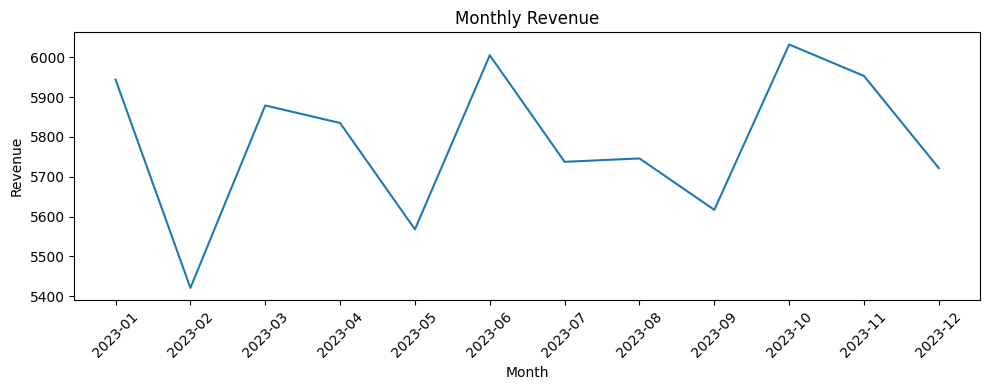

In [ ]:
# Revenue Over Time

monthly = df.groupby("month")["total_spent"].sum().reset_index()

plt.figure(figsize=(10,4))
plt.plot(monthly["month"], monthly["total_spent"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


In [ ]:
# Product Performance

df.groupby("item")["total_spent"].sum().sort_values(ascending=False)

item
Salad       14890.0
Sandwich    11680.0
Smoothie    11608.0
Juice        9108.0
Cake         9009.0
Coffee       6210.0
Tea          4179.0
Cookie       2775.0
Name: total_spent, dtype: float64

In [ ]:
# Channel Analysis

df.groupby("location")["total_spent"].sum()

location
In-store    21318.0
Takeaway    20508.0
Unknown     27633.0
Name: total_spent, dtype: float64

In [ ]:
# Payment Method Analysis

df.groupby("payment_method")["total_spent"].sum()


payment_method
Cash              16121.5
Credit Card       15834.0
Digital Wallet    15885.5
Unknown           21618.0
Name: total_spent, dtype: float64

## Key Insights
- Top-3 products generate the majority of total revenue.
- Almost 40% of transactions have unknown sales channel.
- Payment method data is missing for ~30% of transactions.
- Average check remains stable throughout the year.

## Recommendations
- Improve POS data validation to reduce missing values.
- Focus marketing efforts on top-performing products.
- Use product bundles to increase average check.
- Monitor monthly KPIs on a regular basis.